In [ ]:
#Mounting Google Drive to access the Dataset Stored
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd drive/My\ Drive/hotdog
!ls

/content/drive/.shortcut-targets-by-id/1KVRKyAQIe7qbg31YqyjylTmTkjV_25X1/hotdog


In [ ]:
import numpy as np
import os
import cv2
size = 227

#Function to read the images and load as numpy array
def load_data():
    hotdog = len(os.listdir('./hotdog'))
    nothotdog = len(os.listdir('./nothotdog'))
    datasetx = np.ndarray((hotdog+nothotdog, size, size, 3))
    datasety = np.ndarray((hotdog+nothotdog, 1))
    i = 0
    print(hotdog)
    print(nothotdog)
    #return 1,2
    for img in os.listdir('./hotdog'):
        mat = cv2.imread('./hotdog/'+img)
        datasetx[i] = mat
        datasety[i] = 1
        i+=1
        if(i%100==1):
          print(i,end=' ')
    print()
    print('NH')
    for img in os.listdir('./nothotdog'):
        mat = cv2.imread('./nothotdog/'+img)
        datasetx[i] = mat
        datasety[i] = 0
        i += 1
        if(i%100==1):
          print(i,end=' ')
    return datasetx, datasety

In [ ]:
#Libraries to read and load the images
import os
import cv2

import numpy as np
from sklearn.model_selection import train_test_split

#Librarires to build the Neural-Net model
import tensorflow.compat.v1 as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.compat.v1.losses import log_loss

#Libraries for visualization
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
np.random.seed(1000)
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#Loading Data
datasetx, datasety = load_data()
datasetx = datasetx/255

1090
1891
1 101 201 301 401 501 601 701 801 901 1001 
NH
1101 1201 1301 1401 1501 1601 1701 1801 1901 2001 2101 2201 2301 2401 2501 2601 2701 2801 2901 

In [ ]:
#Splitting into test-train set
X_train, X_test, y_train, y_test = train_test_split(datasetx, datasety, test_size = 0.15, shuffle = True, stratify=datasety, random_state = 0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(2533, 227, 227, 3) (448, 227, 227, 3)
(2533, 1) (448, 1)


In [ ]:
#Instantiate an empty model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='valid'))

#Flattening the 3-D Array
model.add(Flatten())

# 1st Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.5))

# 2nd Fully Connected Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

# Compile the model
model.compile(loss=log_loss, optimizer= tf.keras.optimizers.Adam(0.00001), metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
activation (Activation)      (None, 55, 55, 96)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
activation_1 (Activation)    (None, 27, 27, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [ ]:
#Fitting the model
model.fit(X_train,y_train,batch_size=64,epochs=35,validation_data=(X_test, y_test))

Train on 2533 samples, validate on 448 samples
Epoch 1/35
2533/2533 [==============================] - ETA: 0s - loss: 0.6535 - acc: 0.6340WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
2533/2533 [==============================] - 8s 3ms/sample - loss: 0.6535 - acc: 0.6340 - val_loss: 0.6424 - val_acc: 0.6339
Epoch 2/35
2533/2533 [==============================] - 7s 3ms/sample - loss: 0.6129 - acc: 0.6344 - val_loss: 0.6137 - val_acc: 0.6339
Epoch 3/35
2533/2533 [==============================] - 7s 3ms/sample - loss: 0.5681 - acc: 0.6802 - val_loss: 0.5846 - val_acc: 0.6362
Epoch 4/35
2533/2533 [==============================] - 7s 3ms/sample - loss: 0.5506 - acc: 0.6968 - val_loss:

In [ ]:
#Saving model weights for future use
model.save_weights('./seq_model/checkpoints/my_checkpoint')

In [ ]:
model.save('saved_model/my_model_binClass')
#new_model = tf.keras.models.load_model('saved_model/my_model')

In [ ]:
from tensorflow.keras import models
new_model = models.load_model('saved_model/my_model_binClass', custom_objects={'log_loss':log_loss})

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
y_preds = model.predict(X_test)

In [ ]:
#Deciding the threshold for classification
acc = 0
thresh = 0.52
for i in range(len(y_test)):
  if( (y_preds[i]>=thresh and y_test[i]==1) or (y_preds[i]<thresh and y_test[i]==0) ):
    acc += 1
print(acc/len(y_test))

0.7991071428571429


In [ ]:
#Evaluating model's performance
preds = model.predict(X_test)
print(confusion_matrix(y_test, preds>thresh))
wrongs10 = []
wrongs01 = []
for i in range(y_test.shape[0]):
    if(y_test[i] == 1 and preds[i] <= thresh):
      wrongs10.append(i)
    if(y_test[i] == 0 and preds[i] > thresh):
      wrongs01.append(i)
print(wrongs10)
print(wrongs01)

[[260  24]
 [ 66  98]]
[14, 33, 39, 40, 41, 42, 47, 48, 49, 56, 68, 73, 85, 86, 92, 97, 99, 109, 138, 142, 144, 153, 156, 167, 182, 188, 195, 203, 212, 220, 223, 230, 244, 245, 246, 247, 254, 260, 261, 262, 269, 272, 274, 279, 284, 293, 294, 306, 309, 315, 323, 339, 342, 344, 354, 356, 361, 377, 378, 379, 386, 396, 411, 414, 415, 442]
[44, 66, 78, 129, 132, 134, 146, 194, 208, 219, 236, 250, 259, 286, 307, 313, 320, 329, 363, 376, 391, 406, 428, 429]


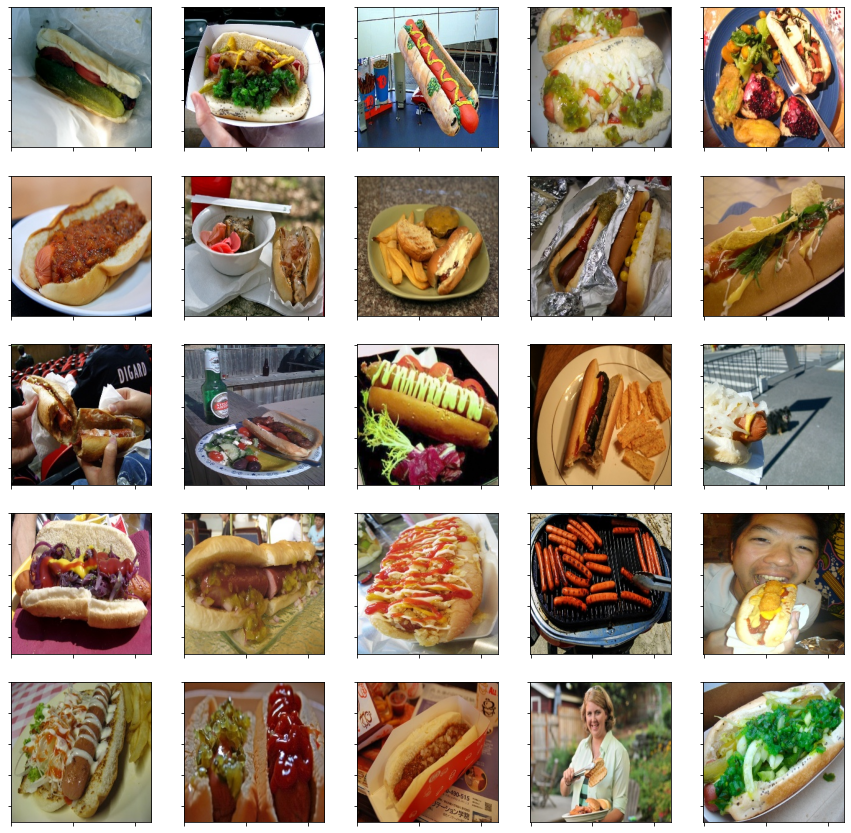

In [ ]:
plt.subplots(5,5,figsize=(15,15))
for i in range(5):
    for j in range(5):
        ind = i*5+j
        img = np.float32(X_test[wrongs10[ind]])
        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        plt.subplot(5,5,i*5+j+1)
        ax = plt.gca()
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        plt.imshow(img)
plt.show()

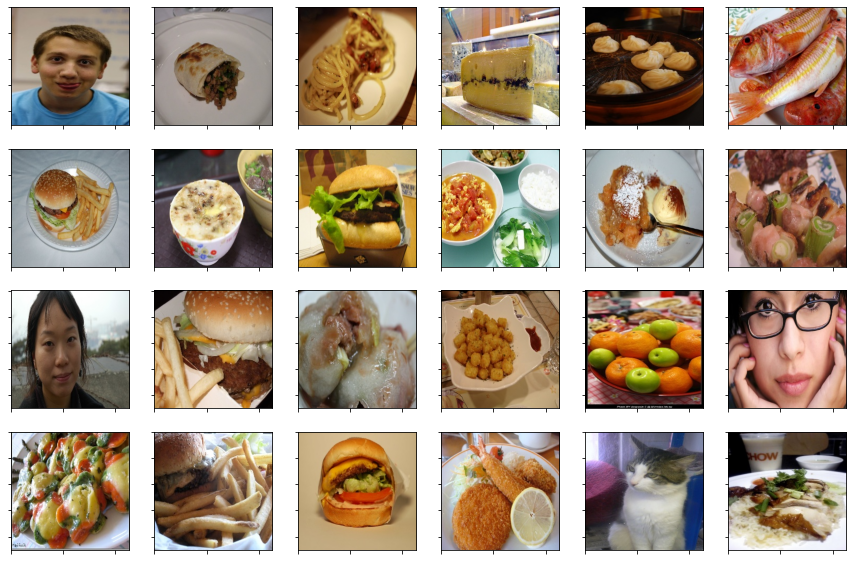

In [ ]:
plt.subplots(4,6,figsize=(15,10))
for i in range(4):
    for j in range(6):
        ind = i*6+j
        img = np.float32(X_test[wrongs01[ind]])
        img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
        plt.subplot(4,6,i*6+j+1)
        ax = plt.gca()
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])
        plt.imshow(img)
plt.show()

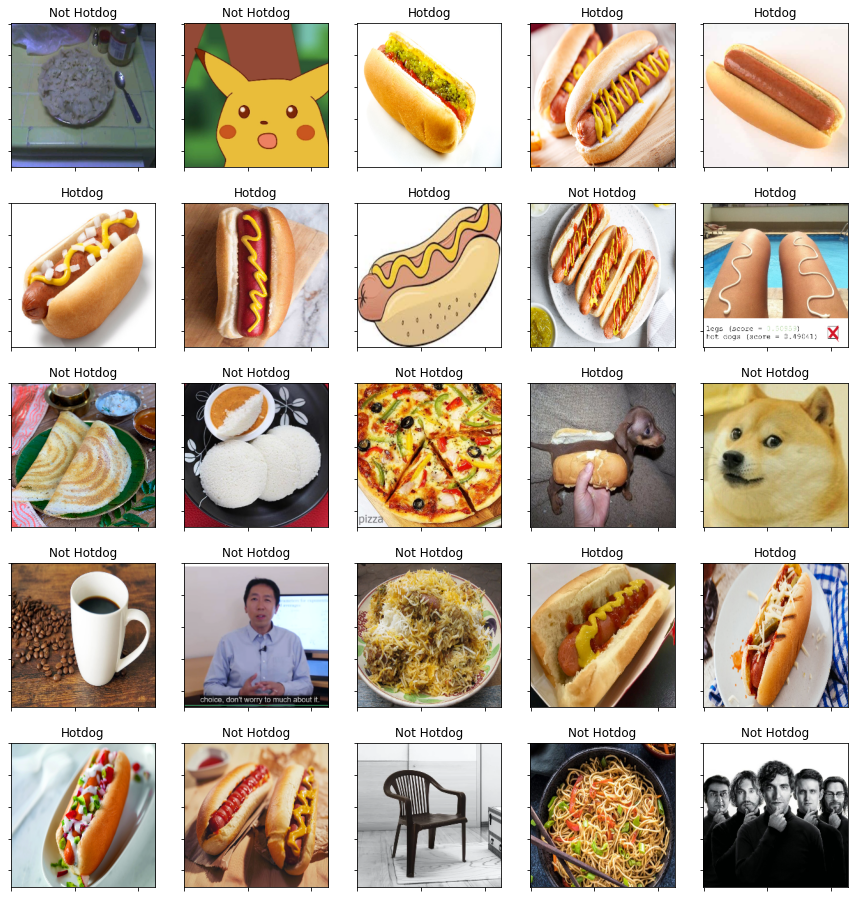

In [ ]:
plt.subplots(5,5,figsize=(15,16))
c = 1
for fil in os.listdir("./test"):
    img = cv2.imread("./test/"+fil)   
    rimg = cv2.resize(img, (227,227))
    rimgd = rimg.reshape((1,227,227,3))
    rimgd = rimgd/255
    rimg = cv2.cvtColor(rimg, cv2.COLOR_BGR2RGB)
    plt.subplot(5,5,c); c+=1
    ax = plt.gca()
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    plt.imshow(rimg)
    preds = model.predict(rimgd)
    #preds = sess.run(y_pred,feed_dict={X:rimgd, hold_prob1:1.0,hold_prob2:1.0})
    title = "Hotdog" if ((preds[0] > 0.52)) else "Not Hotdog"
    plt.title(title)
plt.show()